In [77]:
import pandas as pd
import numpy as np 

In [78]:
from  comprendre_api.Clean_donnees import liste_propre


data = pd.concat([liste_propre(code_commune=None, taille_echantillon=10000),
                liste_propre(code_commune=None, taille_echantillon=10000),
                liste_propre(code_commune=None, taille_echantillon=10000),
                liste_propre(code_commune=None, taille_echantillon=10000)],
                axis=0, 
                ignore_index=True)
data.head(1)

,_id,consommation_energie,classe_consommation_energie,estimation_ges,surface_thermique_lot,classe_estimation_ges,annee_construction,tr002_type_batiment_description,code_insee_commune_actualise,geo_adresse,consommation_surface_ratio
0,WRYV9xQCjLUgZ4MAK3wKu,132.0,3.0,29.0,190.0,4.0,5200.0,Maison Individuelle,01430,3 Impasse du Foyer Rural 01160 Varambon,0.694737


In [74]:
data.describe()

,consommation_energie,classe_consommation_energie,estimation_ges,surface_thermique_lot,classe_estimation_ges,annee_construction,consommation_surface_ratio
count,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000
mean,262.284691,4.611325,35.564179,108.587223,3.904870,1940.871801,3.825178
std,125.443069,1.218897,57.446559,144.313725,1.718514,244.016199,4.284877
min,-4.000000,1.000000,0.710000,6.000000,1.000000,-1.000000,-0.040708
25%,179.000000,4.000000,11.100000,66.000000,3.000000,1948.000000,1.645455
50%,239.110000,5.000000,24.060000,89.570000,4.000000,1974.000000,2.698238
75%,321.000000,5.000000,50.540000,120.400000,5.000000,1989.000000,4.437647
max,1217.760000,7.000000,2326.330000,4120.000000,7.000000,5200.000000,77.426000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   _id                              17660 non-null  object 
 1   consommation_energie             17660 non-null  float64
 2   classe_consommation_energie      17660 non-null  float64
 3   estimation_ges                   17660 non-null  float64
 4   surface_thermique_lot            17660 non-null  float64
 5   classe_estimation_ges            17660 non-null  float64
 6   annee_construction               17660 non-null  float64
 7   tr002_type_batiment_description  17660 non-null  object 
 8   code_insee_commune_actualise     17660 non-null  object 
 9   geo_adresse                      17660 non-null  object 
 10  consommation_surface_ratio       17660 non-null  float64
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [69]:
condition=(data['annee_construction']<1800)|(data['annee_construction']>2023)|(data['consommation_energie']<0)
data=data[~condition]
data.describe()


,consommation_energie,classe_consommation_energie,estimation_ges,surface_thermique_lot,classe_estimation_ges,annee_construction,consommation_surface_ratio
count,17176.000000,17176.000000,17176.000000,17176.000000,17176.000000,17176.000000,17176.000000
mean,263.835205,4.626223,35.909562,108.485000,3.927573,1970.829762,3.859059
std,125.863997,1.214285,57.998289,145.376664,1.712526,26.264531,4.327587
min,7.450000,1.000000,0.740000,6.000000,1.000000,1900.000000,0.028818
25%,179.800000,4.000000,11.490000,66.000000,3.000000,1948.000000,1.661380
50%,241.000000,5.000000,25.000000,89.600000,4.000000,1974.000000,2.715324
75%,322.470000,5.000000,51.000000,120.000000,5.000000,1990.000000,4.470069
max,1217.760000,7.000000,2326.330000,4120.000000,7.000000,2013.000000,77.426000


<Axes: xlabel='classe_consommation_energie'>

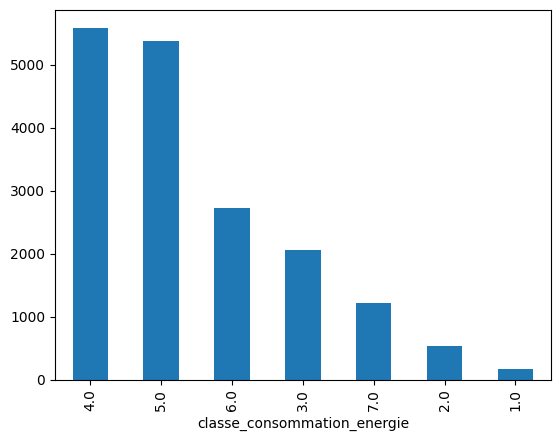

In [49]:
data['classe_consommation_energie'].value_counts().plot(kind='bar')

<Axes: xlabel='tr002_type_batiment_description'>

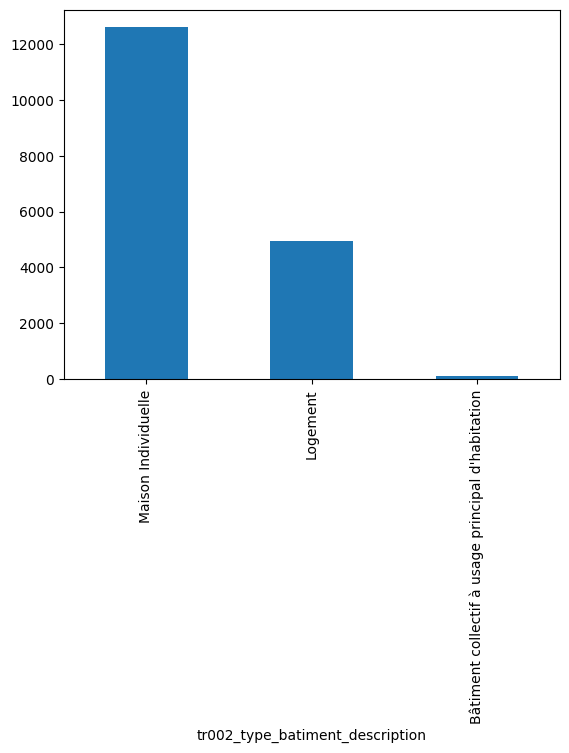

In [50]:
data['tr002_type_batiment_description'].value_counts().plot(kind='bar')

<Axes: >

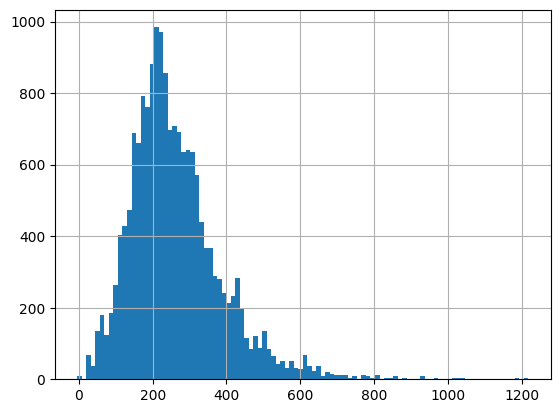

In [52]:
data['consommation_energie'].hist(bins=100)

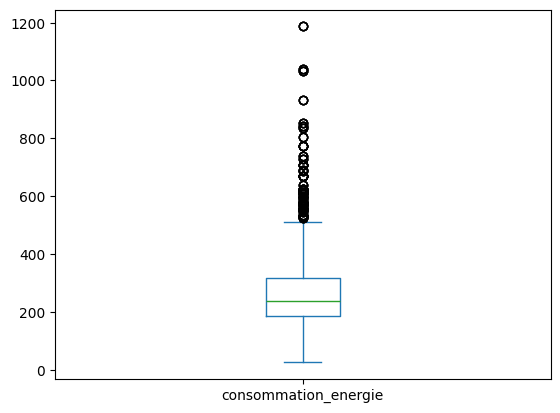

In [55]:
data[(data['tr002_type_batiment_description']=="Logement")]['consommation_energie'].plot.box()
Q1=data[(data['tr002_type_batiment_description']=="Logement")]['consommation_energie'].quantile(0.25)
Q3=data[(data['tr002_type_batiment_description']=="Logement")]['consommation_energie'].quantile(0.75)
IQR=Q3-Q1
coef=IQR*1.5
limite_inf=Q1-coef
limite_sup=Q3+coef
result=data[(data['consommation_energie']>limite_sup)|(data['consommation_energie']<limite_inf)]
data_clean=data.drop(result.index)
# data_clean['consommation_energie'].hist(bins=100)


In [71]:


for elem in data['tr002_type_batiment_description'].unique().tolist(): 
    data_sorted= data[data['tr002_type_batiment_description']==elem]
    print(f"{elem}: {np.mean(data_sorted['consommation_energie'])} kWhEP/m².an ")
    print(f"{elem}: {np.mean(data_sorted['estimation_ges'])} Kg eqCO2/m².an ")



Logement: 268.29783444816053 kWhEP/m².an 
Logement: 36.77678093645485 Kg eqCO2/m².an 
Maison Individuelle: 261.4205771111836 kWhEP/m².an 
Maison Individuelle: 35.51785784153896 Kg eqCO2/m².an 
Bâtiment collectif à usage principal d'habitation: 330.5564516129032 kWhEP/m².an 
Bâtiment collectif à usage principal d'habitation: 41.20516129032258 Kg eqCO2/m².an 
